In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as sklpp
from sklearn import decomposition as skldecomp
import matplotlib.pyplot as plt

In [2]:
train_X = pd.read_csv('./dataset/X_tran.csv')

In [3]:
mean_datascaler = sklpp.StandardScaler(with_mean=True, with_std=False)
ctd_train_X = mean_datascaler.fit_transform(train_X)
data_pca = skldecomp.PCA(n_components=0.90, svd_solver='full')
skl_features = data_pca.fit_transform(ctd_train_X)

In [4]:
from sklearn.cluster import SpectralClustering

In [13]:
y_pred = SpectralClustering(n_clusters=6).fit_predict(skl_features)

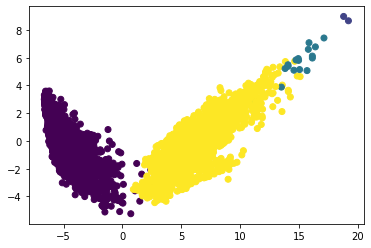

In [17]:
plt.scatter(skl_features[:,0], skl_features[:,1],c=y_pred)
plt.show()

In [15]:
label_Y = pd.read_csv('./dataset/y_tran.csv')

In [21]:
series=[]
pre_label=[]
for i in range(0,6):
    print('pre label------',i,'------')
    position = np.argwhere(y_pred == i).T[0]
    one_se = []
    for pos in position:
        one_se.append(label_Y.loc[pos].iloc[0])
    series.append(one_se)
    print('most label')
    p_l = max(one_se,key=one_se.count)
    print(p_l)
    pre_label.append(p_l)

pre label------ 0 ------
most label
6.0
pre label------ 1 ------
most label
3.0
pre label------ 2 ------
most label
3.0
pre label------ 3 ------
most label
6.0
pre label------ 4 ------
most label
3.0
pre label------ 5 ------
most label
1.0


In [20]:
pre_Y = pre_label
accr = []
total = 0
for i in range(0,6):
    accr.append(series[i].count(pre_Y[i])/len(series[i]))
    total = total + series[i].count(pre_Y[i])
accy = total/len(label_Y)
print(accr)
print(accy)

[0.34571850393700787, 1.0, 1.0, 1.0, 1.0, 0.37538273116962645]
0.36085418933623503
